In [5]:
# 1.
import pandas as pd

url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#2
# Find columns with missing values
missing_features = df.columns[df.isnull().any()].tolist()

print("Features with missing values:", missing_features)


Features with missing values: ['Age', 'Cabin', 'Embarked']


In [12]:
#3
# Fill missing values in 'Age' with the mean of 'Age'
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Verify if missing values are filled
print(df.isnull().sum())  # Should show 0 missing values in 'Age' and 'Cabin'


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


<ipython-input-12-98164b33f867>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


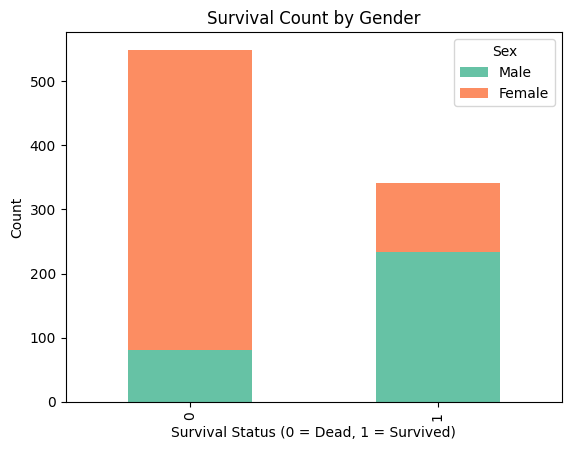

In [18]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")

# Count the number of survivors and non-survivors by gender
survival_counts = df.groupby(["Survived", "Sex"]).size().unstack()

# Plot the stacked bar chart
survival_counts.plot(kind="bar", stacked=True, color=[colors[0], colors[1]])

# Add labels and title
plt.xlabel("Survival Status (0 = Dead, 1 = Survived)")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(title="Sex", labels=["Male", "Female"])

# Show the plot
plt.show()


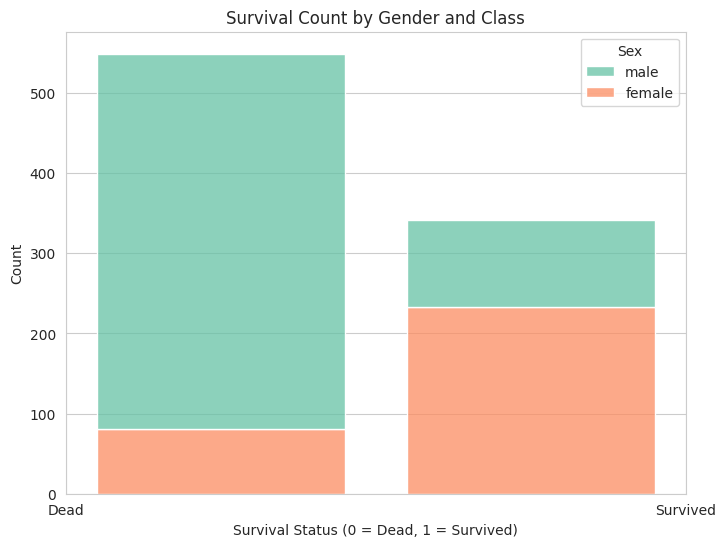

In [19]:
# 5
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x="Survived",
    hue="Sex",
    multiple="stack",
    palette="Set2",
    shrink=0.8,
    bins=2
)

# Add labels and title
plt.xlabel("Survival Status (0 = Dead, 1 = Survived)")
plt.ylabel("Count")
plt.title("Survival Count by Gender and Class")
plt.xticks([0, 1], ["Dead", "Survived"])

# Show the plot
plt.show()


In [20]:
# 6
# Define a function to assign AgeClass
def assign_age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

# Apply the function to create 'AgeClass' column
df['AgeClass'] = df['Age'].apply(assign_age_class)

# Display first few rows to check
df[['Age', 'AgeClass']].head()


,Age,AgeClass
0,22.0,1
1,38.0,3
2,26.0,1
3,35.0,2
4,35.0,2


In [24]:
# 7
# Drop the 'Age' column
df.drop(columns=['Age'], inplace=True)

# Verify if the column is dropped
print(df.head())  # Display the first few rows


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare    Cabin Embarked  AgeClass  
0         A/5 21171   7.2500  Unknown        S         1  
1          PC 17599  71.2833      C85        C         3  
2  STON/O2. 3101282   7.9250  Unknown        S         1  
3            113803  53.1000     C123        S         2  
4            373450

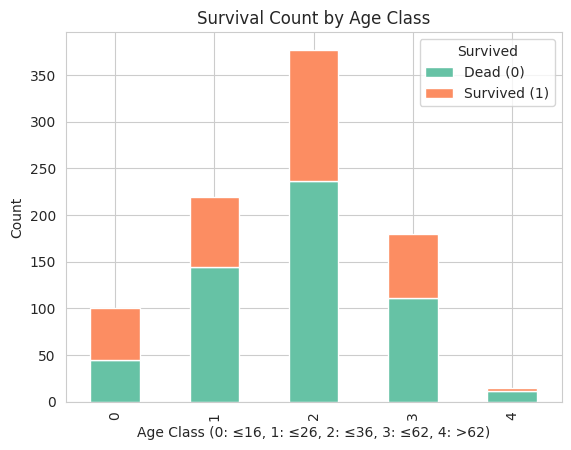

In [25]:
# 8
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of Survived and Dead for each AgeClass
ageclass_survival_counts = df.groupby(["AgeClass", "Survived"]).size().unstack()

# Plot the stacked bar chart
ageclass_survival_counts.plot(kind="bar", stacked=True, color=sns.color_palette("Set2"))

# Add labels and title
plt.xlabel("Age Class (0: ≤16, 1: ≤26, 2: ≤36, 3: ≤62, 4: >62)")
plt.ylabel("Count")
plt.title("Survival Count by Age Class")
plt.legend(title="Survived", labels=["Dead (0)", "Survived (1)"])

# Show the plot
plt.show()
